In [1]:
import pandas as pd
df = pd.read_csv('marketing_campaign.csv',sep='\t')
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
#Dropping the nan rows
df = df.dropna()

In [4]:
#dropping useless columns
df.drop(columns=['ID','Z_Revenue','Z_CostContact'],inplace=True)

In [5]:
#Converting to age
df.rename(columns={'Year_Birth':'Age'},inplace=True)
df['Age'] = 2023 - df['Age']
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,66,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,69,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,58,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,39,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,42,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [6]:
#simplifying education colmn
#df['Education'].value_counts()
#df['Education'].unique()
#using label encoding as there is relation between course and difficulty
df['Education'] = df['Education'].replace({'Basic':0,'Graduation':1,'2n Cycle':2,'Master':3,'PhD':4})

In [7]:
#resolving the Marital Status colmn
#df['Marital_Status'].value_counts()
#df['Marital_Status'].unique()
#married and together kept as 1
df['Marital_Status']=df['Marital_Status'].replace({'Divorced':0,'Single':0,'Married':1,'Together':1,'Absurd':0,'Widow':0,'YOLO':0,'Alone':0})
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,66,1,0,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,69,1,0,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,58,1,1,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,39,1,1,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,42,4,1,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [8]:
#making new total spending colmn
df['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending
0,66,1,0,58138.0,0,0,04-09-2012,58,635,88,...,4,7,0,0,0,0,0,0,1,1617
1,69,1,0,46344.0,1,1,08-03-2014,38,11,1,...,2,5,0,0,0,0,0,0,0,27
2,58,1,1,71613.0,0,0,21-08-2013,26,426,49,...,10,4,0,0,0,0,0,0,0,776
3,39,1,1,26646.0,1,0,10-02-2014,26,11,4,...,4,6,0,0,0,0,0,0,0,53
4,42,4,1,58293.0,1,0,19-01-2014,94,173,43,...,6,5,0,0,0,0,0,0,0,422


In [9]:
#making children colmn
df['Total_Children'] = df['Teenhome'] + df['Kidhome']
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Children
0,66,1,0,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,1,1617,0
1,69,1,0,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,0,27,2
2,58,1,1,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,0,776,0
3,39,1,1,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,0,53,1
4,42,4,1,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,0,422,1


In [10]:
#Converting date colmn to usable type
from datetime import datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'] = (datetime.now() - df['Dt_Customer']).dt.days
df.rename(columns={'Dt_Customer':'User_Since'},inplace=True)
df.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,User_Since,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Spending,Total_Children
0,66,1,0,58138.0,0,0,4176,58,635,88,...,7,0,0,0,0,0,0,1,1617,0
1,69,1,0,46344.0,1,1,3626,38,11,1,...,5,0,0,0,0,0,0,0,27,2
2,58,1,1,71613.0,0,0,3825,26,426,49,...,4,0,0,0,0,0,0,0,776,0
3,39,1,1,26646.0,1,0,3652,26,11,4,...,6,0,0,0,0,0,0,0,53,1
4,42,4,1,58293.0,1,0,3674,94,173,43,...,5,0,0,0,0,0,0,0,422,1


In [11]:
df.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'User_Since', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Spending', 'Total_Children'],
      dtype='object')

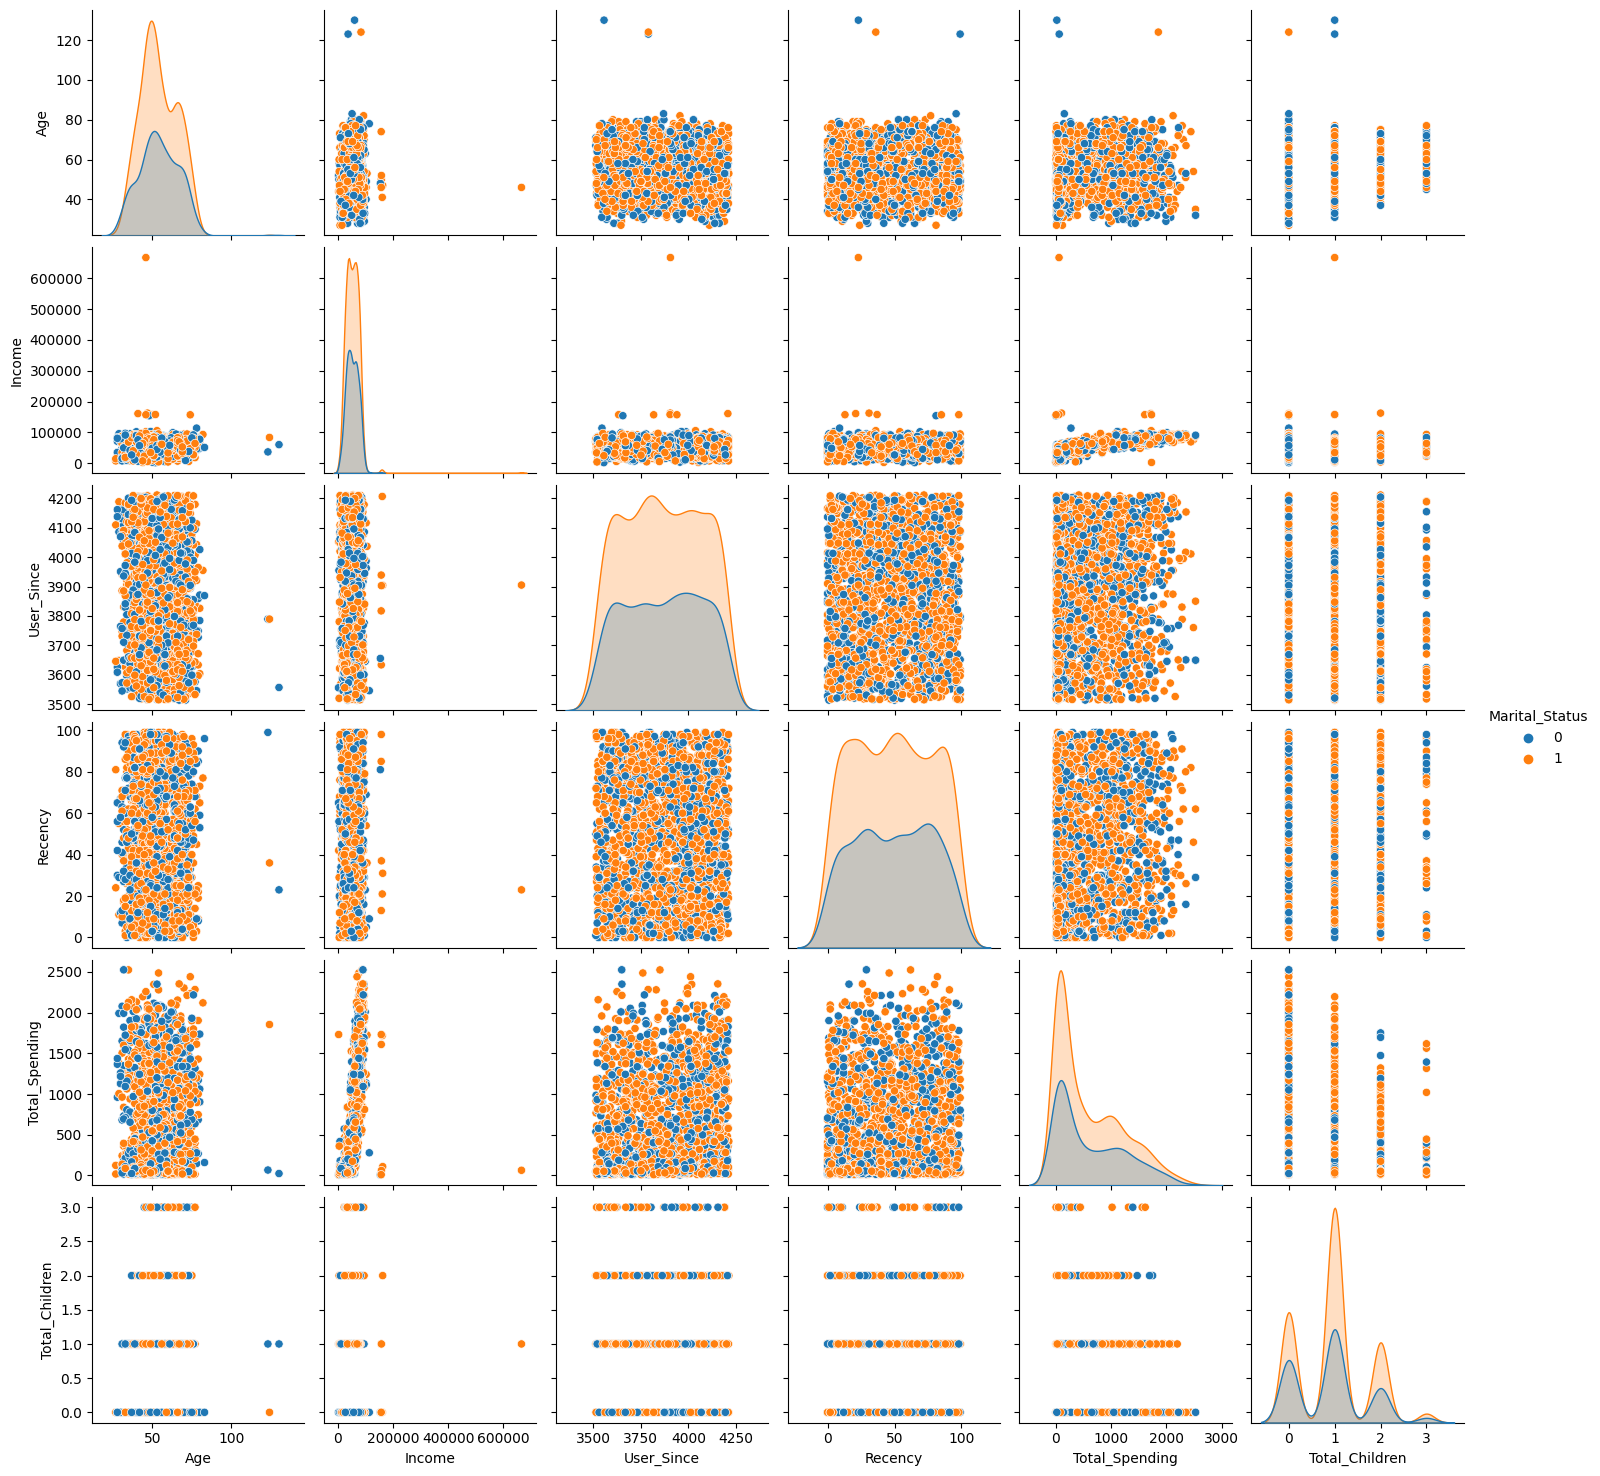

In [12]:
#Plotting to find outliers
import seaborn as sns
plots = ['Age','Income','User_Since','Recency','Total_Spending','Total_Children','Marital_Status']
sns.pairplot(df[plots],hue='Marital_Status')

In [13]:
#before outlier removal
df.shape

(2216, 28)

In [14]:
#dropping the outliers
df = df[df['Age']<100]
df = df[df['Income']<600000]
df.shape

(2212, 28)

In [15]:
df.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'User_Since', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Spending', 'Total_Children'],
      dtype='object')

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
#scaling and dropping unnecessary data 
from sklearn.preprocessing import StandardScaler
segmentation_df = df[['Age', 'Education', 'Marital_Status', 'Income','User_Since', 'Recency','Total_Spending', 'Total_Children']]
segmentation_df["Frequency"] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
scaler = StandardScaler()
scaler.fit(segmentation_df)
scaled_df = pd.DataFrame(scaler.transform(segmentation_df),columns= segmentation_df.columns )
scaled_df.head()

,Age,Education,Marital_Status,Income,User_Since,Recency,Total_Spending,Total_Children,Frequency
0,1.018352,-0.818727,-1.349603,0.287105,1.527721,0.310353,1.676245,-1.264598,1.317945
1,1.274785,-0.818727,-1.349603,-0.260882,-1.189011,-0.380813,-0.963297,1.404572,-1.159273
2,0.334530,-0.818727,0.740959,0.913196,-0.206048,-0.795514,0.280110,-1.264598,0.796425
3,-1.289547,-0.818727,0.740959,-1.176114,-1.060584,-0.795514,-0.920135,0.069987,-0.898513
4,-1.033114,1.529187,0.740959,0.294307,-0.951915,1.554453,-0.307562,0.069987,0.535666


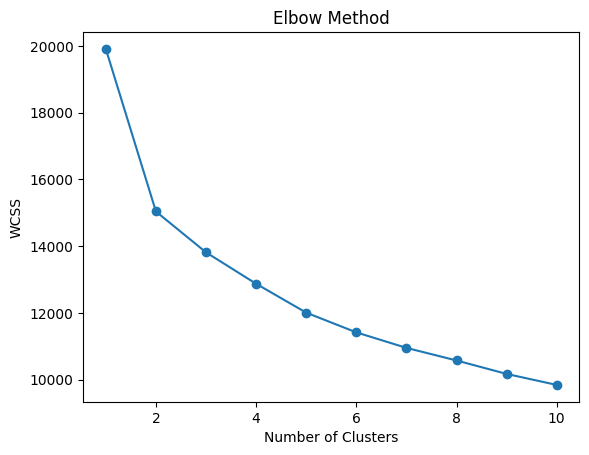

In [18]:
#plotting the elbow curve
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=11), k=11)

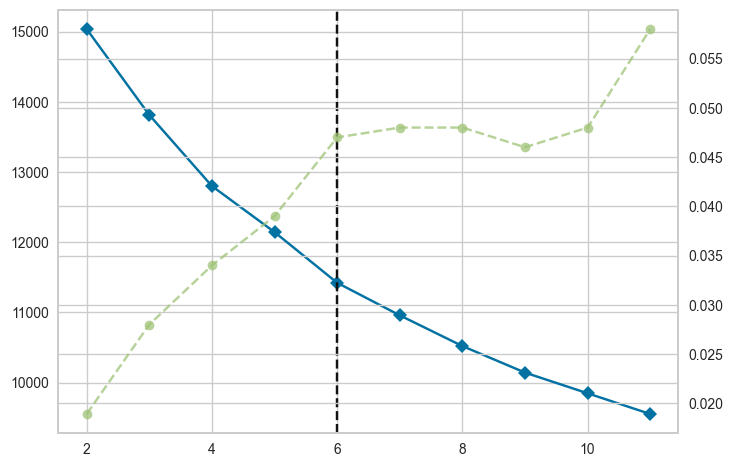

In [19]:
#plotted using external fxn
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model,k=11)
visualizer.fit(scaled_df)

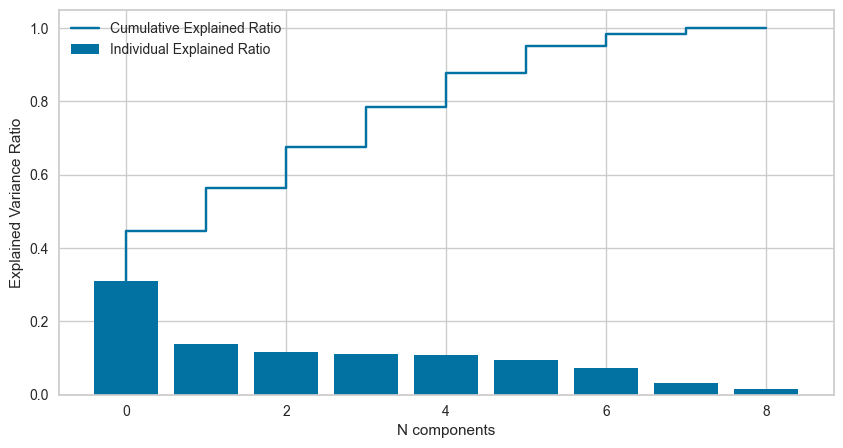

In [20]:
#pca
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(scaled_df)
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,5))
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label="Individual Explained Ratio")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label="Cumulative Explained Ratio")
plt.xlabel("N components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.show()

In [21]:
#using pca to reduce dimensions
cols = ["PCA1", "PCA2", "PCA3"]
pca = PCA(n_components=len(cols))
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(cols))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PCA1,2212.0,-1.284887e-17,1.668046,-2.816047,-1.596976,-0.198400,1.489898,6.178495
PCA2,2212.0,-1.124276e-17,1.113837,-2.926025,-0.785523,-0.046336,0.756484,3.847429
PCA3,2212.0,-5.139550e-17,1.028538,-2.858180,-0.721000,0.004027,0.740845,3.075821


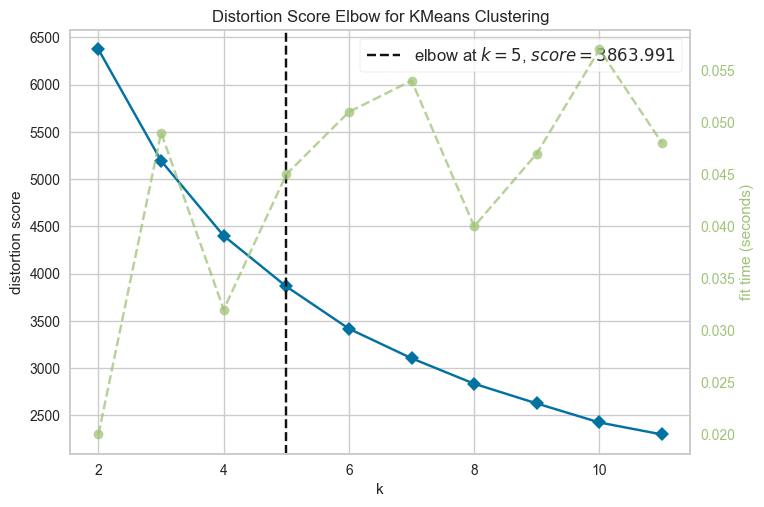

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
#plotting the pca reduced df
model = KMeans()
visualizer = KElbowVisualizer(model, k=11)
visualizer.fit(PCA_df)
visualizer.show() 

In [23]:
#Initiating the Agglomerative Clustering model
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
AC_df = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = AC_df
#Adding the Clusters feature to the orignal dataframe.
final_df = segmentation_df.copy()
final_df["Clusters"]= AC_df

In [24]:
final_df

,Age,Education,Marital_Status,Income,User_Since,Recency,Total_Spending,Total_Children,Frequency,Clusters
0,66,1,0,58138.0,4176,58,1617,0,25,4
1,69,1,0,46344.0,3626,38,27,2,6,2
2,58,1,1,71613.0,3825,26,776,0,21,1
3,39,1,1,26646.0,3652,26,53,1,8,0
4,42,4,1,58293.0,3674,94,422,1,19,3
...,...,...,...,...,...,...,...,...,...,...
2235,56,1,1,61223.0,3894,46,1341,1,18,3
2236,77,4,1,64014.0,3532,56,444,3,22,3
2237,42,1,0,56981.0,3668,91,1241,0,19,4
2238,67,3,1,69245.0,3669,8,843,1,23,3


<AxesSubplot: title={'center': 'Distribution Of The Clusters'}, xlabel='Clusters', ylabel='Count'>

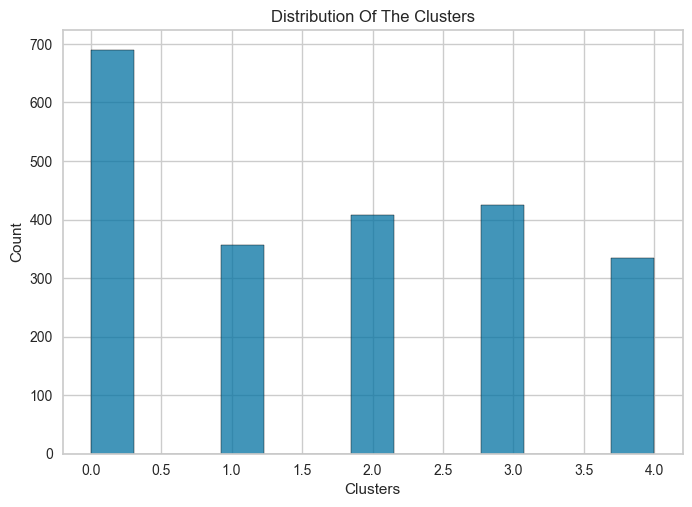

In [25]:
#checking distribution of clusters
plt.title("Distribution Of The Clusters")
sns.histplot(data=final_df,x='Clusters')

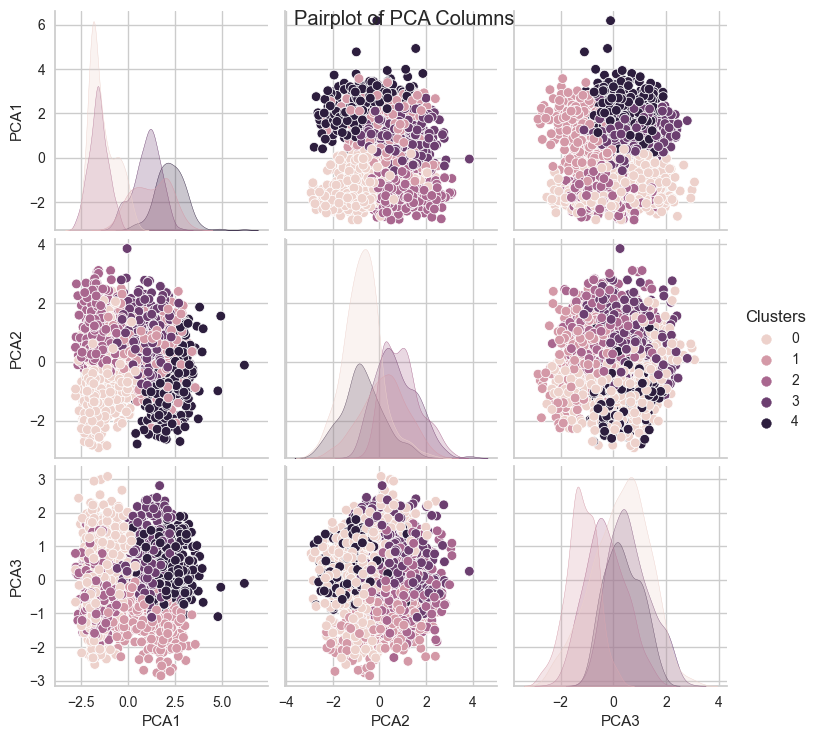

In [26]:
sns.pairplot(data=PCA_df, vars=['PCA1', 'PCA2', 'PCA3'], hue='Clusters')
plt.suptitle("Pairplot of PCA Columns")
plt.show()

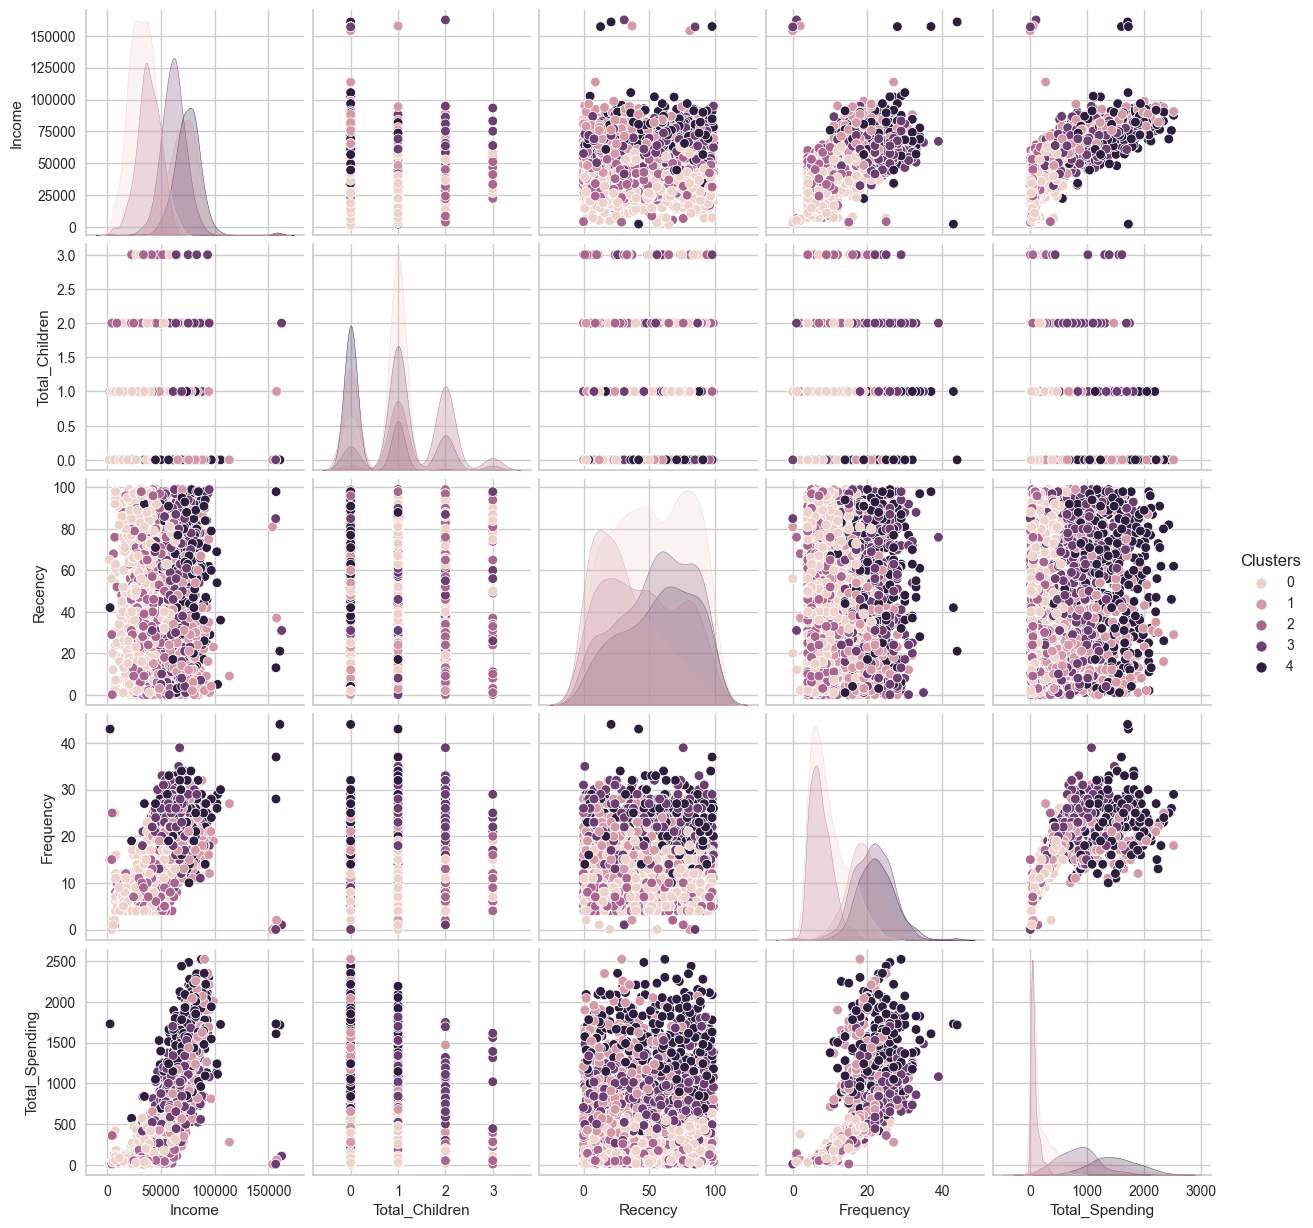

In [27]:
sns.pairplot(final_df[["Clusters","Income","Total_Children","Recency", "Frequency", "Total_Spending"]],hue= "Clusters")
plt.show()

In [28]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

columns = ["Income", "Age", "Total_Children", "Recency", "Frequency", "Total_Spending"]

# Create a subplot grid
fig = make_subplots(rows=2, cols=3, subplot_titles=[f'Clusters vs. {column}' for column in columns], horizontal_spacing=0.15)

for i, column in enumerate(columns):
    row = i // 3 + 1
    col = i % 3 + 1
    
    # Create a box plot for each column
    trace = go.Box(y=final_df[column], x=final_df["Clusters"], name=f'Clusters vs. {column}', )
    fig.add_trace(trace, row=row, col=col)

# Update layout
fig.update_layout(
    showlegend=False,
    height=800,
    title_text="Clusters vs. Numeric Columns",
)

# Show the plot
fig.show()

In [29]:
#insights into the clusters
means = final_df.groupby(['Clusters']).agg({'Total_Children': 'mean',
                                            'Income': 'mean',
                                            'Age': 'mean',
                                            'Recency': 'mean',
                                            'Frequency': 'mean',
                                            'Total_Spending': 'mean'})
# Calculate the count of records (rows) in each cluster
counts = final_df['Clusters'].value_counts().reset_index()
counts.columns = ['Clusters', 'Count']

# Merge the mean and count DataFrames
result = pd.merge(means, counts, on='Clusters')
result

,Clusters,Total_Children,Income,Age,Recency,Frequency,Total_Spending,Count
0,0,1.052250,33303.278665,48.024673,52.293179,9.510885,154.013062,689
1,1,0.442577,70266.675070,54.450980,30.994398,18.775910,990.635854,357
2,2,1.609337,38205.380835,56.540541,45.292383,7.587224,80.734644,407
3,3,1.105882,62057.254118,61.969412,55.903529,21.352941,837.007059,425
4,4,0.263473,74783.844311,53.179641,57.314371,22.517964,1481.790419,334


In [30]:
#creating a rfm df
rfm_df = pd.DataFrame()
rfm_df['R_rank'] = final_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = final_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = final_df['Total_Spending'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

#calculating rfm score
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05 #making on scale of 5
rfm_df = rfm_df.round(2)
rfm_df

,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,40.62,89.24,89.26,4.10
1,61.27,15.30,15.31,1.11
2,73.60,74.98,74.99,3.74
3,73.60,26.85,26.86,1.69
4,5.12,66.34,66.36,2.86
...,...,...,...,...
2235,54.31,62.30,62.31,3.06
2236,42.85,79.20,79.22,3.69
2237,8.44,66.34,66.36,2.88
2238,91.74,83.27,83.29,4.23


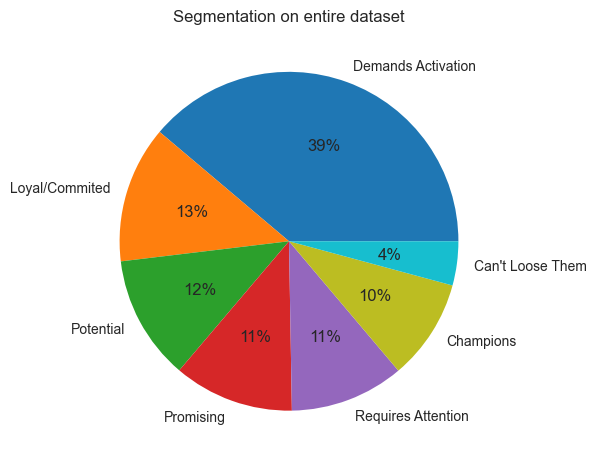

In [31]:
def rfm(rfm_df):
    if rfm_df['RFM_Score'] >= 4.5:
        return 'Can\'t Loose Them'
    elif ((rfm_df['RFM_Score'] >= 4) and (rfm_df['RFM_Score'] < 4.5)):
        return 'Champions'
    elif ((rfm_df['RFM_Score'] >= 3.5) and (rfm_df['RFM_Score'] < 4)):
        return 'Loyal/Commited'
    elif ((rfm_df['RFM_Score'] >= 3) and (rfm_df['RFM_Score'] < 3.5)):
        return 'Potential'
    elif ((rfm_df['RFM_Score'] >= 2.5) and (rfm_df['RFM_Score'] < 3)):
        return 'Promising'
    elif ((rfm_df['RFM_Score'] >= 2) and (rfm_df['RFM_Score'] < 2.5)):
        return 'Requires Attention'
    else:
        return 'Demands Activation'
    
rfm_df['Customer_segment'] = rfm_df.apply(rfm, axis=1)

#plotting the pie chart
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#bcbd22', '#17becf']
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%',
       colors=custom_colors)
plt.title("Segmentation on entire dataset")
plt.show()

In [32]:
rfm_df['Clusters'] = final_df['Clusters']
rfm_df

,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment,Clusters
0,40.62,89.24,89.26,4.10,Champions,4
1,61.27,15.30,15.31,1.11,Demands Activation,2
2,73.60,74.98,74.99,3.74,Loyal/Commited,1
3,73.60,26.85,26.86,1.69,Demands Activation,0
4,5.12,66.34,66.36,2.86,Promising,3
...,...,...,...,...,...,...
2235,54.31,62.30,62.31,3.06,Potential,3
2236,42.85,79.20,79.22,3.69,Loyal/Commited,3
2237,8.44,66.34,66.36,2.88,Promising,4
2238,91.74,83.27,83.29,4.23,Champions,3


In [33]:
selected_cluster = int(input('Enter the Cluster No(0-4)'))
cluster_rfm_df = rfm_df[rfm_df['Clusters'] == selected_cluster][['Customer_segment','Clusters']]
cluster_rfm_df

,Customer_segment,Clusters
4,Promising,3
12,Requires Attention,3
13,Requires Attention,3
22,Promising,3
24,Potential,3
...,...,...
2225,Loyal/Commited,3
2226,Champions,3
2235,Potential,3
2236,Loyal/Commited,3


In [34]:
import plotly.express as px
import pandas as pd

# Calculate the value counts for the pie chart
pie_data = cluster_rfm_df['Customer_segment'].value_counts().reset_index()

# Rename columns for better readability
pie_data.columns = ['Customer_segment', 'Count']

# Set a color palette for better visualization
colors = px.colors.qualitative.Set3

# Create a pie chart with improved aesthetics using Plotly Express
fig = px.pie(pie_data,
             names='Customer_segment',
             values='Count',
             title=f'Customer Segmentation for Cluster {selected_cluster}',
             template='plotly_dark',  # Use a dark template for better contrast
             color_discrete_sequence=colors,
             hole=0.4,  # Set the center hole size
             )

# Display the pie chart
fig.show()